<a href="https://colab.research.google.com/github/rohanreddych/symmetrical-guacamole/blob/master/pre-preprocessed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
!cat /proc/cpuinfo

In [22]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [4]:
max_features = 10000
maxlen = 500
batch_size = 32
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
(train_data, test_data), info = tfds.load(
    "imdb_reviews",
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True)

17465344/17464789 [==============================] - 0s 0us/step


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9PYDL9/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9PYDL9/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9PYDL9/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [11]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
for i,j in test_data.take(2):
    print(i,j)

tf.Tensor(b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.", shape=(), dtype=string) tf.Tensor(1, shape=(),

In [15]:
(a,b),c = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ7U91P/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ7U91P/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ7U91P/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [18]:
for i,j in a.take(2):
    print(i,j)

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(
[  12   31   93  867    7 1256 6585 7961  421  365    2   26   14    9
  988 1089    7

In [19]:
encoder = c.features["text"].encoder
print(encoder.vocab_size)a

8185


In [20]:
encoder.decode(i)

'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.'

In [24]:
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train,  maxlen=maxlen)

In [25]:
model = tf.keras.models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 150ms/step - loss: 0.7300 - accuracy: 0.5544 - val_loss: 0.6534 - val_accuracy: 0.6006
Epoch 2/10
157/157 [==============================] - 22s 142ms/step - loss: 0.5522 - accuracy: 0.7376 - val_loss: 0.6786 - val_accuracy: 0.6512
Epoch 3/10
157/157 [==============================] - 22s 143ms/step - loss: 0.4665 - accuracy: 0.8131 - val_loss: 0.6974 - val_accuracy: 0.6306
Epoch 4/10
157/157 [==============================] - 23s 148ms/step - loss: 0.3775 - accuracy: 0.8561 - val_loss: 1.0536 - val_accuracy: 0.6550
Epoch 5/10
157/157 [==============================] - 23s 144ms/step - loss: 0.2102 - accuracy: 0.9343 - val_loss: 1.2935 - val_accuracy: 0.7120
Epoch 6/10
157/157 [==============================] - 23s 145ms/step - loss: 0.0998 - accuracy: 0.9811 - val_loss: 1.7280 - val_accuracy: 0.6974
Epoch 7/10
157/157 [==============================] - 23s 144ms/step - loss: 0.0534 - accuracy: 0.9948 - val_loss: 1.8911 - val_ac

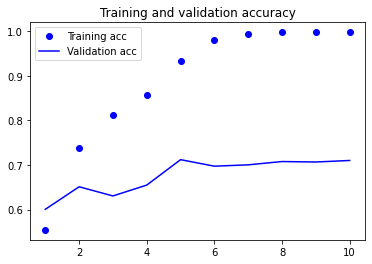

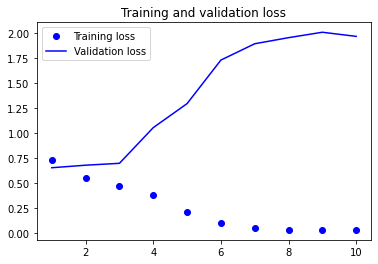

In [28]:
import matplotlib.pyplot as plt
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
loss=hist.history["loss"]
val_loss=hist.history["val_loss"]
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
model2 = Sequential()
model2.add(layers.Embedding(10000, 32))
model2.add(layers.SimpleRNN(32))
model2.add(layers.Dense(1))
model2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [43]:
def encoder_fn(x,y):
    x = x.numpy()
    x = encoder.encode(x)
    return x,y
def dumm(x,y):
    print(x,y)

In [35]:
for i,j in train_data.take(2):
    print(i,j)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on t

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer4 = Tokenizer(num_words=50)


In [3]:
string = "Fat cat sat on mat"
tokenizer.fit_on_texts(string)

In [6]:
str1 = "A variant of one-hot encoding is the so-called one-hot hashing trick, which you can usewhen the number of unique tokens in your vocabulary is too large to handle explicitly.Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, you can hash words into vectors of fixed size. This is typically done with a very lightweight hashing function. The main advantage of this method is that it does away with maintaining an explicit word index, which saves memory and allows online encoding of the data (you can generate token vectors right away, before you’ve seen all of the available data). The one drawback of this approach is that it’s susceptible to hash collisions: two different words may end up with the same hash, and subsequently any machine-learning model looking at these hashes won’t be able to tell the difference between these words. The likelihood of hash collisions decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed. Listing 6.4 Word-level one-hot"

In [7]:
str2 = "Another popular and powerful way to associate a vector with a word is the use of dense word vectors, also called word embeddings. Whereas the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same dimensionality as the number of words in the vocabulary), word embeddings are low-dimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors); see figure 6.2. Unlike the word vectors obtained via one-hot encoding, word embeddings are learned from data. It’s common to see word embeddings that are 256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large vocabularies. On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or greater (capturing a vocabulary of 20,000 tokens, in this case). So, word embeddings pack more information into far fewer dimensions."

In [8]:
str3 = "The simplest way to associate a dense vector with a word is to choose the vector at random. The problem with this approach is that the resulting embedding space has no structure: for instance, the words accurate and exact may end up with completely different embeddings, even though they’re interchangeable in most sentences. It’s difficult for a deep neural network to make sense of such a noisy, unstructured embedding space. To get a bit more abstract, the geometric relationships between word vectors should reflect the semantic relationships between these words. Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, you would expect synonyms to be embedded into similar word vectors; and in general, you would expect the geometric distance (such as L2 distance) between any two word vectors to relate to the semantic distance between the associated words (words meaning different things are embedded at points far away from each other, whereas related words are closer). In addition to distance, you may want specific directions in the embedding space to be meaningful. To make this clearer, let’s look at a concrete example."

In [11]:
tokenizer1.fit_on_texts([str1, str2, str3])

In [12]:
tokenizer1.word_index

{'000': 75,
 '024': 170,
 '1': 169,
 '2': 162,
 '20': 74,
 '256': 167,
 '4': 144,
 '512': 168,
 '6': 64,
 'a': 5,
 'able': 132,
 'abstract': 210,
 'accurate': 192,
 'addition': 229,
 'advantage': 105,
 'all': 121,
 'allows': 113,
 'also': 150,
 'an': 52,
 'and': 13,
 'another': 146,
 'any': 61,
 'approach': 55,
 'are': 11,
 'as': 43,
 'assigning': 93,
 'associate': 66,
 'associated': 223,
 'at': 26,
 'available': 122,
 'away': 35,
 'be': 40,
 'before': 118,
 'being': 141,
 'between': 22,
 'binary': 152,
 'bit': 209,
 'called': 47,
 'can': 30,
 'capturing': 178,
 'case': 179,
 'choose': 185,
 'clearer': 234,
 'closer': 228,
 'collisions': 56,
 'common': 166,
 'completely': 194,
 'concrete': 237,
 'data': 36,
 'dealing': 171,
 'decreases': 136,
 'deep': 202,
 'dense': 42,
 'dictionary': 97,
 'difference': 134,
 'different': 38,
 'difficult': 201,
 'dimensional': 20,
 'dimensionality': 63,
 'dimensions': 183,
 'directions': 232,
 'distance': 28,
 'does': 108,
 'done': 101,
 'drawback': 12

In [14]:
str11 = "A fat cat mat"
string

'Fat cat sat on mat'

In [15]:
tokenizer2.fit_on_texts([string, str11])

In [16]:
tokenizer2.word_index

{'a': 6, 'cat': 2, 'fat': 1, 'mat': 3, 'on': 5, 'sat': 4}

In [19]:
tokenizer3.fit_on_texts([str1, str2, str3])

In [21]:
len(tokenizer3.word_index)

238

In [23]:
tokenizer4.fit_on_texts([str2, str1, str3])
tokenizer4.word_index

{'000': 62,
 '024': 110,
 '1': 109,
 '2': 102,
 '20': 61,
 '256': 107,
 '4': 182,
 '512': 108,
 '6': 55,
 'a': 5,
 'able': 170,
 'abstract': 210,
 'accurate': 192,
 'addition': 229,
 'advantage': 143,
 'all': 159,
 'allows': 151,
 'also': 90,
 'an': 69,
 'and': 12,
 'another': 86,
 'any': 77,
 'approach': 72,
 'are': 11,
 'as': 32,
 'assigning': 131,
 'associate': 47,
 'associated': 223,
 'at': 26,
 'available': 160,
 'away': 40,
 'be': 43,
 'before': 156,
 'being': 179,
 'between': 22,
 'binary': 92,
 'bit': 209,
 'called': 48,
 'can': 39,
 'capturing': 118,
 'case': 119,
 'choose': 185,
 'clearer': 234,
 'closer': 228,
 'collisions': 73,
 'common': 106,
 'completely': 194,
 'concrete': 237,
 'data': 35,
 'dealing': 111,
 'decreases': 174,
 'deep': 202,
 'dense': 30,
 'dictionary': 135,
 'difference': 172,
 'different': 41,
 'difficult': 201,
 'dimensional': 16,
 'dimensionality': 53,
 'dimensions': 123,
 'directions': 232,
 'distance': 28,
 'does': 146,
 'done': 139,
 'drawback': 161

In [25]:
len(tokenizer4.word_index)

238